In [17]:
import pandas as pd
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import re
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Embedding, Dense, LSTM,BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [103]:
data = pd.read_table('ck_data.txt',names = ['label','reviews'])

## 파이썬 - 프로그래밍 기초
- data 관리프로그램
    - data 수집 및 관리
    - data의 분석은 인간관점의 분석을 의미

## 데이터 수집 및 시각화
학습을 진행하기 위한 데이터 수집 방법 학습

## 머신러닝 딥러닝 기초
전문가 시스템
- 인간이 정한 규칙을 전달 규칙에 맞는 답을 제시
1. 머신러닝
    - 머신러닝의 모델은 수학적으로 정의
    - 순차적인 프로그래밍
    - 데이터 기반의 학습이지만 수학적 규칙이 정해져있는 모델을 차용한다.
2. 딥러닝
    - 데이터 기반의 학습
    - 데이터를 통한 인간이 인지하지 못하는 부분의 데이터 특징을 컴퓨터 스스로 인식해서 학습하는 전반적인 과정
    - 자연어 -> 트랜스포머
    - 이미지 - 트랜스포머
    - 추천 시스템

## 기계학습을 통한 분류기 완성
1. 결측치 확인
2. 중복 확인
3. data 분포도
4. 전처리
5. 모델생성 (순환)
6. 모델튜닝 (하이퍼 파라미터, 쉘종류, 모델종류, 학습반복수, 뉴런, 층수, BN, Dropout 등) (학습제어 : 얼리스스타핑, 모델 체크)
7. 결과 기반 동작 확인기 (최종적인 분류기 완성)

In [6]:
data=data.rename(columns = {'label':'y', 'reviews' : 'X'})

In [9]:
data.isnull().values.any()

False

In [13]:
np.sum(data.isnull())

y    0
X    0
dtype: int64

In [14]:
data['X'].nunique(), data['y'].nunique()

(99892, 2)

In [15]:
data=data.drop_duplicates(subset=['X'])
data['clean_X']=data.X.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
data['clean_X']=data.clean_X.str.replace('^ +','')
data['clean_X']=data.clean_X.replace('',np.nan)
data=data.dropna(how='any')

C:\Users\user\AppData\Local\Temp/ipykernel_12332/3476282902.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_X']=data.X.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
C:\Users\user\AppData\Local\Temp/ipykernel_12332/3476282902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_X']=data.X.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
C:\Users\user\AppData\Local\Temp/ipykernel_12332/3476282902.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_X']=data.clean_X.str.replace('^ +','')
C:\Users\user\AppData\Local\Temp/ipykernel_12332/3476282902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [16]:
s_w=set(['은','는','이','가','를','들','에게','의','을','도','으로','만','라서','하다'])
okt=Okt()
from tqdm import tqdm 
X_data=[] 
for i in tqdm(data['clean_X']): 
    tk_d=okt.morphs(i) 
    end_d=[w for w in tk_d if not w in s_w] 
    X_data.append(' '.join(end_d))

100%|████████████████████████████████████████████████████████████████████████████████| 99892/99892 [12:47<00:00, 130.10it/s]


In [18]:
data['y_name']=data['y']
data['encoder_y']=LabelEncoder().fit_transform(data['y'])
data['categorical_y']=list(to_categorical(data['encoder_y']))

In [23]:
Y=np.array(data['encoder_y'])

In [24]:
X=np.array(X_data)

In [54]:
x_data2,test_x2,y_data2,test_y2 = train_test_split(X,Y,test_size=0.3,random_state=0)

In [55]:
train_x2,val_x2,train_y2,val_y2 = train_test_split(x_data2,y_data2,test_size=0.2,random_state=0)

In [56]:
(train_x2.shape,train_y2.shape),(test_x2.shape,test_y2.shape),(val_x2.shape,val_y2.shape)

(((55939,), (55939,)), ((29968,), (29968,)), ((13985,), (13985,)))

In [57]:
tk2 = Tokenizer()
tk2.fit_on_texts(train_x2)

In [58]:
n=len([d for d in sorted(list(tk2.word_counts.items()),key=lambda x:x[1]) if d[1]>4])+1

In [59]:
n

12528

In [60]:
token2=Tokenizer(n)
token2.fit_on_texts(train_x2)

In [61]:
token_train_x2=token2.texts_to_sequences(train_x2)
token_test_x2=token2.texts_to_sequences(test_x2)
token_val_x2=token2.texts_to_sequences(val_x2)

In [62]:
drop_train2 = [index for index, sentence in enumerate(token_train_x2) if len(sentence) < 1]
drop_test2 = [index for index, sentence in enumerate(token_test_x2) if len(sentence) < 1]
drop_val2 = [index for index, sentence in enumerate(token_val_x2) if len(sentence) < 1]

In [63]:
token_train_x2 = np.delete(token_train_x2, drop_train2, axis=0)
train_y2 = np.delete(train_y2, drop_train2, axis=0)
token_test_x2 = np.delete(token_test_x2, drop_test2, axis=0)
test_y2 = np.delete(test_y2, drop_test2, axis=0)
token_val_x2 = np.delete(token_val_x2, drop_val2, axis=0)
val_y2 = np.delete(val_y2, drop_val2, axis=0)

In [64]:
w_l=len(pad_sequences(token_train_x2)[0])

In [65]:
w_l

53

In [66]:
train_inputs = pad_sequences(token_train_x2,maxlen=w_l)
test_inputs = pad_sequences(token_test_x2,maxlen=w_l)
val_inputs = pad_sequences(token_val_x2,maxlen=w_l)

In [67]:
train_outputs=train_y2
test_outputs=test_y2
val_outputs=val_y2

In [68]:
(train_inputs.shape,train_outputs.shape),(test_inputs.shape,test_outputs.shape),(val_inputs.shape,val_outputs.shape)

(((55568, 53), (55568,)), ((29741, 53), (29741,)), ((13870, 53), (13870,)))

In [145]:
전처리_된_데이터={}
전처리_된_데이터['학습_데이터'] = train_inputs
전처리_된_데이터['학습_결과'] = train_outputs
전처리_된_데이터['테스트_데이터'] = test_inputs
전처리_된_데이터['테스트_결과'] = test_outputs
전처리_된_데이터['검증_데이터'] = val_inputs
전처리_된_데이터['검증_결과'] = val_outputs
전처리_된_데이터['토큰'] = token2
전처리_된_데이터['단어수'] = n
전처리_된_데이터['불용어'] = s_w
전처리_된_데이터['입력길이'] = w_l

In [146]:
전처리_된_데이터.keys()

dict_keys(['학습_데이터', '학습_결과', '테스트_데이터', '테스트_결과', '검증_데이터', '검증_결과', '토큰', '단어수', '불용어', '입력길이'])

In [147]:
import pickle
with open("data.pickle","wb") as fw:
    pickle.dump(전처리_된_데이터, fw)

In [69]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [70]:
model = Sequential()
model.add(Embedding(n, 100))
model.add(LSTM(128,return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [71]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_inputs, train_outputs, epochs=15, callbacks=[es, mc], batch_size=60,validation_data=(val_inputs,val_outputs))

Epoch 1/15
927/927 [==============================] - 139s 142ms/step - loss: 0.5010 - acc: 0.7550 - val_loss: 0.4703 - val_acc: 0.7768

Epoch 00001: val_acc improved from -inf to 0.77678, saving model to best_model.h5
Epoch 2/15
927/927 [==============================] - 127s 137ms/step - loss: 0.3913 - acc: 0.8228 - val_loss: 0.4707 - val_acc: 0.7848

Epoch 00002: val_acc improved from 0.77678 to 0.78479, saving model to best_model.h5
Epoch 3/15
927/927 [==============================] - 126s 136ms/step - loss: 0.3054 - acc: 0.8680 - val_loss: 0.5116 - val_acc: 0.7753

Epoch 00003: val_acc did not improve from 0.78479
Epoch 4/15
927/927 [==============================] - 129s 139ms/step - loss: 0.2223 - acc: 0.9077 - val_loss: 0.6194 - val_acc: 0.7647

Epoch 00004: val_acc did not improve from 0.78479
Epoch 5/15
927/927 [==============================] - 124s 134ms/step - loss: 0.1576 - acc: 0.9365 - val_loss: 0.8180 - val_acc: 0.7659

Epoch 00005: val_acc did not improve from 0.7847

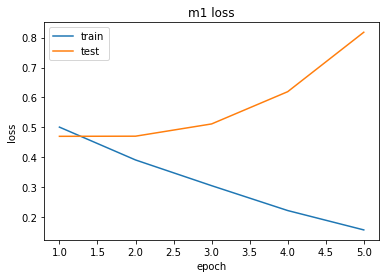

In [72]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('m1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [102]:
loaded_model = load_model('best_model.h5')
a1 = loaded_model.evaluate(test_inputs,test_outputs)[1]
a1

930/930 [==============================] - 27s 28ms/step - loss: 0.4748 - acc: 0.7814


0.7814128398895264

In [129]:
mc2 = ModelCheckpoint('best_model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model2 = Sequential()
model2.add(Embedding(n, 256))
model2.add(LSTM(128,dropout=0.5,return_sequences=True))
model2.add(BatchNormalization())
model2.add(LSTM(64,dropout=0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(train_inputs, train_outputs, epochs=15, callbacks=[es, mc2], batch_size=128,validation_data=(val_inputs,val_outputs))

Epoch 1/15
435/435 [==============================] - 149s 333ms/step - loss: 0.5172 - acc: 0.7390 - val_loss: 0.4900 - val_acc: 0.7795

Epoch 00001: val_acc improved from -inf to 0.77952, saving model to best_model2.h5
Epoch 2/15
435/435 [==============================] - 142s 325ms/step - loss: 0.4113 - acc: 0.8140 - val_loss: 0.4666 - val_acc: 0.7851

Epoch 00002: val_acc improved from 0.77952 to 0.78515, saving model to best_model2.h5
Epoch 3/15
435/435 [==============================] - 139s 319ms/step - loss: 0.3575 - acc: 0.8403 - val_loss: 0.5036 - val_acc: 0.7821

Epoch 00003: val_acc did not improve from 0.78515
Epoch 4/15
435/435 [==============================] - 147s 337ms/step - loss: 0.3063 - acc: 0.8657 - val_loss: 0.5479 - val_acc: 0.7799

Epoch 00004: val_acc did not improve from 0.78515
Epoch 5/15
435/435 [==============================] - 140s 322ms/step - loss: 0.2639 - acc: 0.8857 - val_loss: 0.6292 - val_acc: 0.7745

Epoch 00005: val_acc did not improve from 0.78

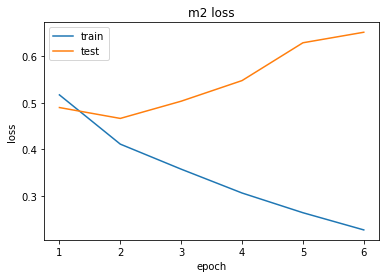

In [130]:
epochs2 = range(1, len(history2.history['acc']) + 1)
plt.plot(epochs2, history2.history['loss'])
plt.plot(epochs2, history2.history['val_loss'])
plt.title('m2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [131]:
loaded_model2 = load_model('best_model2.h5')
a2 = loaded_model2.evaluate(test_inputs,test_outputs)[1]
a2

930/930 [==============================] - 34s 35ms/step - loss: 0.4702 - acc: 0.7846


0.7846071124076843

In [138]:
def 문장_전처리(문장,a):
    문장 = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', 문장)
    문장 = okt.morphs(문장, stem=True)
    문장 = [w for w in 문장 if not w in s_w] 
    encoded = token.texts_to_sequences([문장])
    pad_new = pad_sequences(encoded, maxlen = w_l)
    if a == 1:
        score = float(loaded_model.predict(pad_new))
    if a == 2:
        score = float(loaded_model2.predict(pad_new))
    if(score > 0.5):
        print(f"{score * 100:.2f}% 확률로 긍정 게임 리뷰입니다.\n")
    else:
        print(f"{(1 - score) * 100:.2f}% 확률로 부정 게임 리뷰입니다.\n")

In [140]:
확인_리뷰 = ['역시 재미있네요 전작에서 할수 없었던 자유로운 덱 빌딩도 좋네요^^',
        '재미있었습니다.',
        '좆망겜 하지마 무슨 처음에 키자마자 매칭이 왜 91렙하고 매칭되냐',
        '난 되게 재밋게햇넹 ㅋㅋㅋㅋ 딱 킬링 타임용으로 적당한듯',
        '쓰레기게임 절때사지마',
        '아 중독성있네요 한번하면 멈추기가 힘듬',
        '무료겜이 적당함',
        '컴퓨터로 하지마세요, 걍 플스로 하세요 혼자 이상한데 낑겨서 말도 안되게 버벅 거림 시작한지 1시간만 지워버림니다. 내용을 보기전에 조작감이 쓰레기인 패드랑 키보드 다해봤는데 혼자 이상한데 낑김'
        ]

In [141]:
# 첫번째 모델
for i in 확인_리뷰:
    print(i)
    문장_전처리(i,1)

역시 재미있네요 전작에서 할수 없었던 자유로운 덱 빌딩도 좋네요^^
89.68% 확률로 긍정 게임 리뷰입니다.

재미있었습니다.
89.45% 확률로 긍정 게임 리뷰입니다.

좆망겜 하지마 무슨 처음에 키자마자 매칭이 왜 91렙하고 매칭되냐
95.21% 확률로 부정 게임 리뷰입니다.

난 되게 재밋게햇넹 ㅋㅋㅋㅋ 딱 킬링 타임용으로 적당한듯
97.33% 확률로 긍정 게임 리뷰입니다.

쓰레기게임 절때사지마
97.78% 확률로 부정 게임 리뷰입니다.

아 중독성있네요 한번하면 멈추기가 힘듬
97.32% 확률로 긍정 게임 리뷰입니다.

무료겜이 적당함
57.11% 확률로 긍정 게임 리뷰입니다.

컴퓨터로 하지마세요, 걍 플스로 하세요 혼자 이상한데 낑겨서 말도 안되게 버벅 거림 시작한지 1시간만 지워버림니다. 내용을 보기전에 조작감이 쓰레기인 패드랑 키보드 다해봤는데 혼자 이상한데 낑김
91.35% 확률로 부정 게임 리뷰입니다.



In [142]:
# 두번째 모델
for i in 확인_리뷰:
    print(i)
    문장_전처리(i,2)

역시 재미있네요 전작에서 할수 없었던 자유로운 덱 빌딩도 좋네요^^
90.44% 확률로 긍정 게임 리뷰입니다.

재미있었습니다.
84.59% 확률로 긍정 게임 리뷰입니다.

좆망겜 하지마 무슨 처음에 키자마자 매칭이 왜 91렙하고 매칭되냐
96.78% 확률로 부정 게임 리뷰입니다.

난 되게 재밋게햇넹 ㅋㅋㅋㅋ 딱 킬링 타임용으로 적당한듯
95.71% 확률로 긍정 게임 리뷰입니다.

쓰레기게임 절때사지마
97.97% 확률로 부정 게임 리뷰입니다.

아 중독성있네요 한번하면 멈추기가 힘듬
95.82% 확률로 긍정 게임 리뷰입니다.

무료겜이 적당함
55.98% 확률로 긍정 게임 리뷰입니다.

컴퓨터로 하지마세요, 걍 플스로 하세요 혼자 이상한데 낑겨서 말도 안되게 버벅 거림 시작한지 1시간만 지워버림니다. 내용을 보기전에 조작감이 쓰레기인 패드랑 키보드 다해봤는데 혼자 이상한데 낑김
97.89% 확률로 부정 게임 리뷰입니다.



In [143]:
A = [a1, a2]
for i in range(len(A)):
    print(f'{i+1}번째 모델 정확도:{A[i]*100:.2f}%')

1번째 모델 정확도:78.14%
2번째 모델 정확도:78.46%
